In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [2]:
#Read crypto_data.csv into Pandas. The dataset was obtained from CryptoCompare.


crypto_df = pd.read_csv("crypto_data.csv")

crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
# Discard all cryptocurrencies that are not being traded. In other words, 
# filter for currencies that are currently being traded.
 
crypto_clean = crypto_df[crypto_df["IsTrading"] == True]



# crypto_clean[""]

In [4]:
# Once you have done this, drop the IsTrading column from the dataframe.
crypto_clean1 = crypto_clean.drop("IsTrading", axis=1)

In [5]:
# Remove all rows that have at least one null value
crypto_clean2 = crypto_clean1.dropna()

In [6]:
# Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.
crypto_clean3 = crypto_clean2.loc[crypto_clean["TotalCoinsMined"] > 0]

In [7]:
# delete the CoinName from the original dataframe.
crypto_clean4 = crypto_clean3.drop("CoinName", axis=1)

In [8]:
crypto_clean4 

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,PoW,7.296538e+06,21000000


In [9]:
# crypto_clean = pd.get_dummies(crypto_clean)

crypto_clean5 = crypto_clean4.drop("Unnamed: 0", axis=1)
# crypto_clean

In [10]:
crypto_clean5["TotalCoinSupply"] = pd.to_numeric(crypto_clean5["TotalCoinSupply"])

# crypto_clean = pd.get_dummies(crypto_clean)

# crypto_clean

# for column in crypto_clean.columns:
#     print(column)

crypto_clean5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1247
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        532 non-null    object 
 1   ProofType        532 non-null    object 
 2   TotalCoinsMined  532 non-null    float64
 3   TotalCoinSupply  532 non-null    float64
dtypes: float64(2), object(2)
memory usage: 20.8+ KB


In [11]:
crypto_clean6 = pd.get_dummies(crypto_clean5)

crypto_clean6

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# scaler = StandardScaler().fit(crypto_clean6)
# crypto_scaled = scaler.transform(crypto_clean6)
# crypto_scaled

crypto_scaled = StandardScaler().fit_transform(crypto_clean6)

In [20]:
# Applying PCA to reduce dimensions from 4 to 2

# Initialize PCA model
pca = PCA(n_components=0.90)

# Get two principal components for the iris data.
crypto_pca = pca.fit_transform(crypto_scaled)
# new_df_shopping = pd.DataFrame(crypto_scaled, columns=crypto_clean6.columns)
# new_df_shopping
df_crypto_pca = pd.DataFrame(crypto_pca)
df_crypto_pca

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,2.984956e-12,-5.587163e-15,-4.070858e-16,-0.007129,-1.319756,-0.051813,...,-2.470702e-15,1.891693e-15,-5.539121e-15,-1.279294e-15,-1.078497e-15,-3.351254e-15,3.226812e-15,9.572342e-16,-2.114694e-15,8.762218e-16
1,-0.318434,1.032331,-0.591126,0.001386,2.960484e-12,-5.826890e-15,-4.050436e-16,-0.007739,-1.322514,-0.056674,...,-2.751444e-15,1.650072e-15,-5.142541e-15,-7.870911e-16,-6.950084e-16,-3.692322e-15,3.801505e-15,2.285337e-15,-1.731003e-15,8.828233e-16
2,2.305468,1.656383,-0.683617,0.004731,1.016664e-11,-5.720923e-15,7.053242e-15,-0.054781,-1.542879,-0.943951,...,1.836982e-14,-1.610794e-14,4.401464e-14,9.704872e-15,-2.412961e-14,7.415236e-14,-7.963189e-14,-3.510378e-14,1.064824e-13,-6.609163e-14
3,-0.145184,-1.320593,0.192813,-0.001229,-2.640153e-12,2.427808e-15,-1.548256e-15,-0.002071,0.281463,0.251862,...,2.149155e-15,4.212773e-15,-2.388025e-17,-6.512118e-15,-3.653415e-15,6.466600e-15,-9.028861e-15,4.033250e-15,1.681151e-14,-9.086748e-15
4,-0.151768,-2.036192,0.396182,-0.001705,-3.658854e-12,-8.999548e-16,-1.106936e-15,0.027735,0.519099,0.188820,...,8.462173e-14,1.200669e-14,-4.413189e-14,1.435070e-14,1.071627e-14,-3.707038e-14,-3.236237e-14,-4.319863e-14,1.135017e-13,-1.393439e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.471251,0.822241,-0.071160,-0.008206,-1.779618e-11,4.790188e-16,2.484975e-14,-0.851713,2.041159,3.560713,...,3.356077e-15,3.054632e-15,1.184845e-16,-9.016242e-15,-5.463436e-15,1.170078e-14,-8.315454e-15,2.651186e-15,1.957447e-14,-1.482794e-14
528,-0.333144,1.032071,-0.590740,0.001399,2.990027e-12,-5.703373e-15,-3.884003e-16,-0.007154,-1.320125,-0.052460,...,-2.773426e-15,1.946052e-15,-5.305747e-15,-6.355024e-16,-6.757706e-16,-3.431540e-15,3.302184e-15,1.615773e-15,-2.035311e-15,9.262904e-16
529,0.324349,-2.312308,0.421515,-0.001319,-2.822872e-12,3.798908e-15,-3.554616e-15,0.017309,0.161077,-0.047787,...,1.406014e-14,-1.330168e-14,-5.034158e-14,2.123109e-14,-9.023474e-15,7.422448e-14,2.937163e-14,9.987933e-15,5.106975e-14,-1.020073e-13
530,-0.149364,-2.049336,0.412968,-0.001745,-3.741091e-12,4.690191e-15,-2.985477e-15,0.028954,0.544389,0.233373,...,-1.599624e-15,2.771130e-15,-5.105881e-15,-4.184051e-15,2.681990e-15,-2.097968e-16,-2.102228e-15,3.900490e-15,-2.423699e-15,9.922657e-17


In [23]:
tsne = TSNE(learning_rate=32)

In [25]:
tsne_features = tsne.fit_transform(df_crypto_pca)
tsne_features

array([[  3.0100605,  14.946379 ],
       [  9.253301 ,  17.962957 ],
       [  1.8755451,  27.50473  ],
       ...,
       [  0.8789031, -23.298958 ],
       [-11.721935 , -14.56811  ],
       [ -9.298431 ,   4.8162966]], dtype=float32)

In [26]:
tsne_features.shape

(532, 2)

In [32]:
# The first column of transformed features
df_crypto_pca['x'] = tsne_features[:,0]

# The second column of transformed features
df_crypto_pca['y'] = tsne_features[:,1]

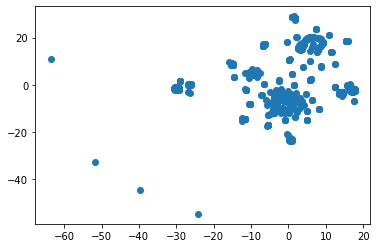

In [34]:
# Visualize the clusters
plt.scatter(df_crypto_pca['x'], df_crypto_pca['y'])
plt.show()

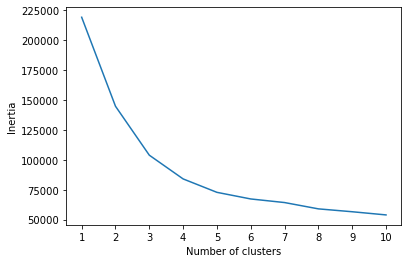

In [37]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_crypto_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()